In [1]:
%matplotlib widget

PORT = '/dev/ttyACM1'
BAUD = 115200

import glitch_utils
from glitch_utils import GlitchResult
from importlib import reload # for debugging

import time
import struct
import matplotlib.pyplot as plt

try:
	del glitcher
except:
	pass

glitcher = glitch_utils.GlitchyMcGlitchFace(PORT, BAUD)

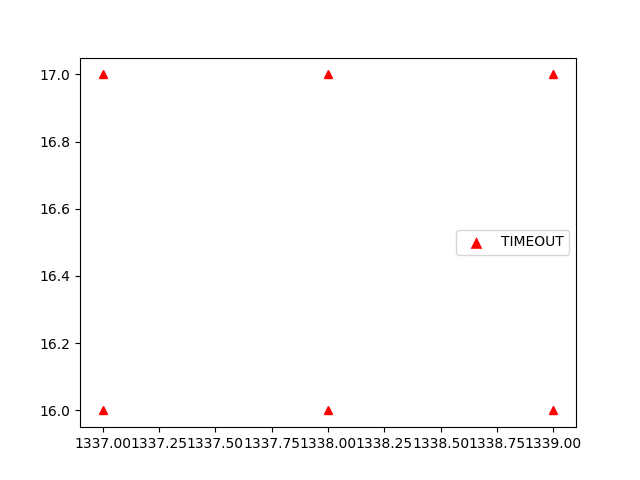

In [2]:
glitch_utils = reload(glitch_utils)

gc = glitch_utils.GlitchController(groups=[r.name for r in GlitchResult], parameters=['ext_offset', 'width'])
gc.set_range('ext_offset', 1337, 1339)
gc.set_range('width', 16, 17)

fig, ax = plt.subplots()

for glitch_setting in gc.rand_glitch_values():
	read_result, read_data = glitcher.glitch_mul(glitch_setting, expected=0x1337)
	gc.add_result(glitch_setting, read_result)
	if read_result == GlitchResult.WEIRD:
		print('Got weird data:', read_data)
	ax.plot(*glitch_setting, glitch_utils.result_to_plt(read_result))
ax.legend(handles=gc.get_legend_elements(), loc='best')